In [1]:
import sys
from pathlib import Path

# Go two levels up to reach project root
project_root = Path.cwd().parents[1]  # from subfolder/ to notebook_folder/ to project_root/
scripts_path = project_root / "scripts"

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [2]:
from scripts.general_scripts.features_engineering import quicky_data, lag_features_indicators
from scripts.general_scripts.pipelines import price_model
from scripts.general_scripts.predict import future_price_prediction
from scripts.general_scripts.lstm import LSTMModelMultiStep, LSTMModelMultiOutput
from scripts.general_scripts.helper import CustomizedLoss
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
scaler = StandardScaler()
model_type = LSTMModelMultiOutput
criterion = CustomizedLoss()
n_lags = 5
n_forecast = 2
seasonal_periods=261

Seasonality Strength: 0.08


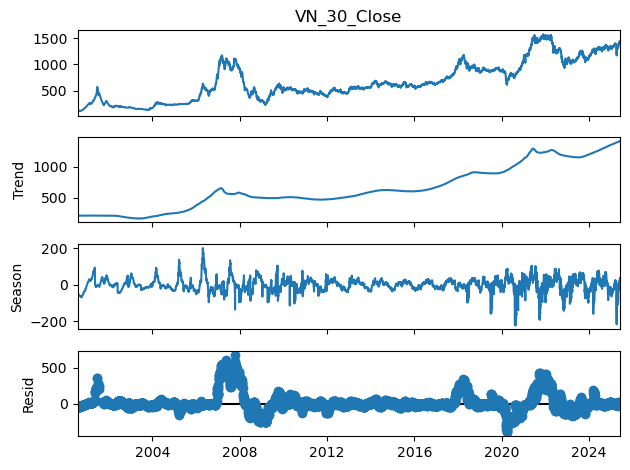

<Figure size 1200x400 with 0 Axes>

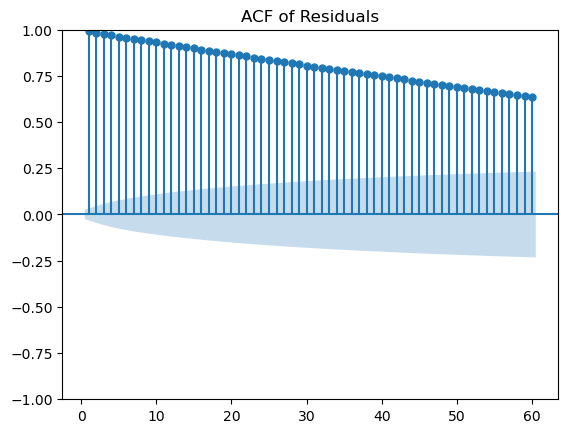

,VN_30_Close,trend,seasonal,residual,dow_sin,dow_cos,month_sin,month_cos
Date,,,,,,,,
2025-05-08,1351.10,1396.882908,-23.385729,-22.397179,0.433884,-0.900969,0.866025,-0.500000
2025-05-09,1352.25,1397.516482,-31.522847,-13.743635,-0.433884,-0.900969,0.866025,-0.500000
2025-05-12,1372.04,1398.150075,-4.407342,-21.702733,0.000000,1.000000,0.866025,-0.500000
2025-05-13,1382.78,1398.783685,3.587123,-19.590808,0.781831,0.623490,0.866025,-0.500000
2025-05-14,1397.87,1399.417313,16.910782,-18.458094,0.974928,-0.222521,0.866025,-0.500000
2025-05-15,1401.49,1400.050958,16.331751,-14.892710,0.433884,-0.900969,0.866025,-0.500000
2025-05-16,1384.44,1400.684621,-9.678799,-6.565822,-0.433884,-0.900969,0.866025,-0.500000
2025-05-19,1379.75,1401.318302,-25.312571,3.744268,0.000000,1.000000,0.866025,-0.500000
2025-05-20,1407.52,1401.952001,-14.727086,20.295085,0.781831,0.623490,0.866025,-0.500000


In [4]:
# 📂 Load dataset
file_path_1 = "../../ready_data/vn_30_data/cleaned_vn_30_data.csv"
df_1 = pd.read_csv(file_path_1)
df_1 = quicky_data(df_1, seasonal_periods)
df_1.tail(20)

In [5]:
baseline = ExponentialSmoothing(
df_1['VN_30_Close'],
trend='add',            # additive trend
seasonal='add',         # additive seasonality
seasonal_periods=seasonal_periods    # one business‐year ≈ 261 days
).fit()

# 2) Forecast the next day (one‐step ahead):
price_forecast = baseline.forecast(n_forecast)

# 3) If you want to extract the trend/seasonal forecasts separately:
fitted_components = baseline.fittedvalues  # this is price = level+trend+seasonal
level = baseline.level                     # the “smoothed level” ≈ trend
seasonal = baseline.season                 # the seasonal factors

print(price_forecast)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


5686    1435.572772
5687    1438.187610
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5685    1438.841272
dtype: float64
Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5685    29.473694
dtype: float64
5685    1408.923844
dtype: float64
[DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-04 00:00:00
(5681, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.0921 - Val Loss: 0.0000
Test Loss: 0.0000
5685    1432.594005
dtype: float64
Date
2025-06-04    1435.279999
dtype: float64
(1,)
1 1 1
RMSE: 2.6860, MAE: 2.6860, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


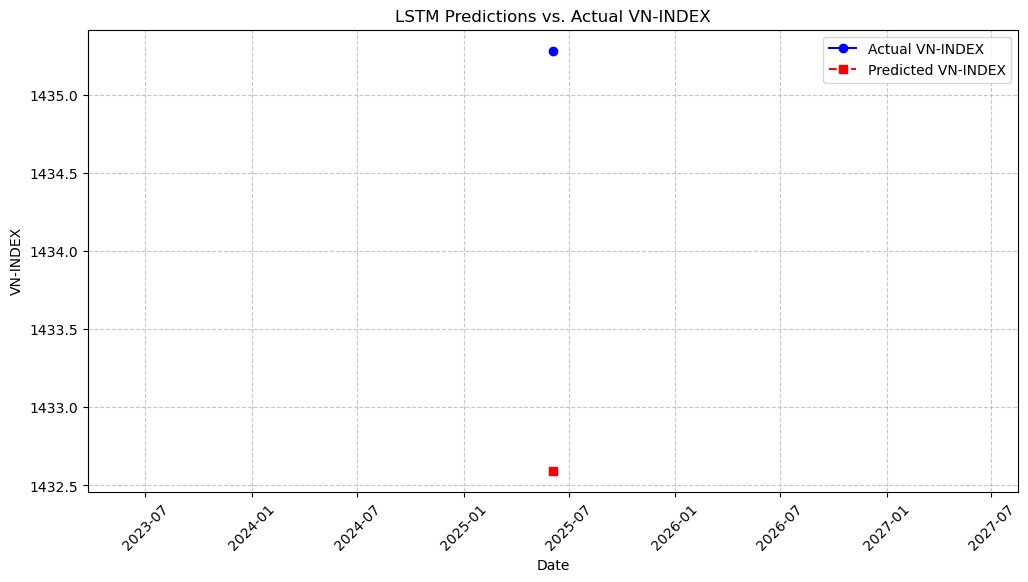

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-04      1435.279999         1432.594005


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5684    1424.507742
dtype: float64
Hello
5684    29.266284
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


5684    1408.289952
dtype: float64
[DatetimeIndex(['2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-03 00:00:00
(5680, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.0920 - Val Loss: 0.0017
Test Loss: 0.0000
5684    1429.418607
dtype: float64
Date
2025-06-03    1437.87
dtype: float64
(1,)
1 1 1
RMSE: 8.4514, MAE: 8.4514, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


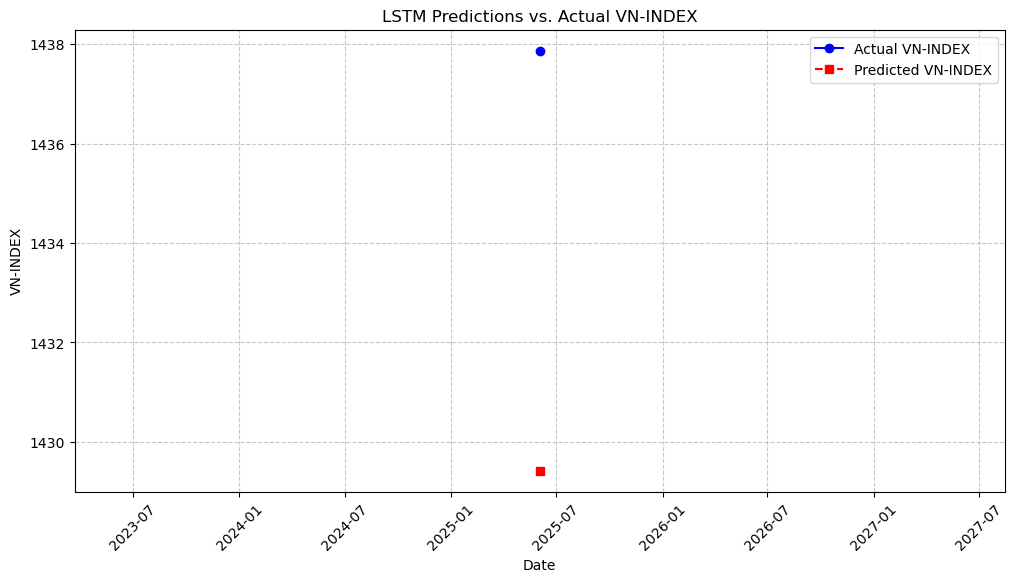

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-03          1437.87         1429.418607


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5683    1426.31174
dtype: float64
Hello
5683    25.056973
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


5683    1407.656077
dtype: float64
[DatetimeIndex(['2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-02 00:00:00
(5679, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.0926 - Val Loss: 0.0029
Test Loss: 0.0017
5683    1428.445243
dtype: float64
Date
2025-06-02    1423.039998
dtype: float64
(1,)
1 1 1
RMSE: 5.4052, MAE: 5.4052, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


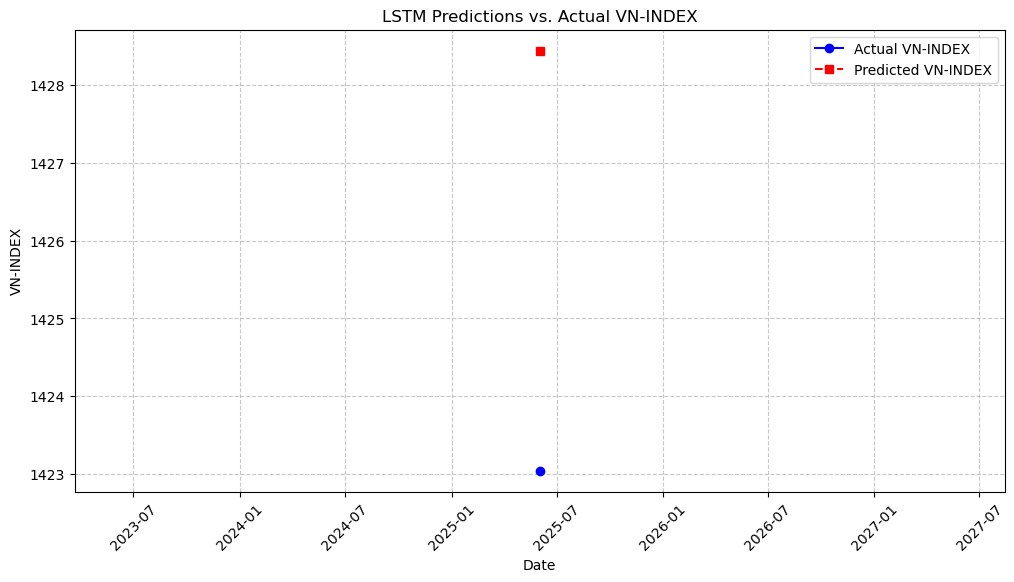

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-02      1423.039998         1428.445243


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5682    1432.54047
dtype: float64
Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5682    24.551189
dtype: float64
5682    1407.022219
dtype: float64
[DatetimeIndex(['2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-05-30 00:00:00
(5678, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.0923 - Val Loss: 0.0010
Test Loss: 0.0029
5682    1434.652876
dtype: float64
Date
2025-05-30    1423.679999
dtype: float64
(1,)
1 1 1
RMSE: 10.9729, MAE: 10.9729, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


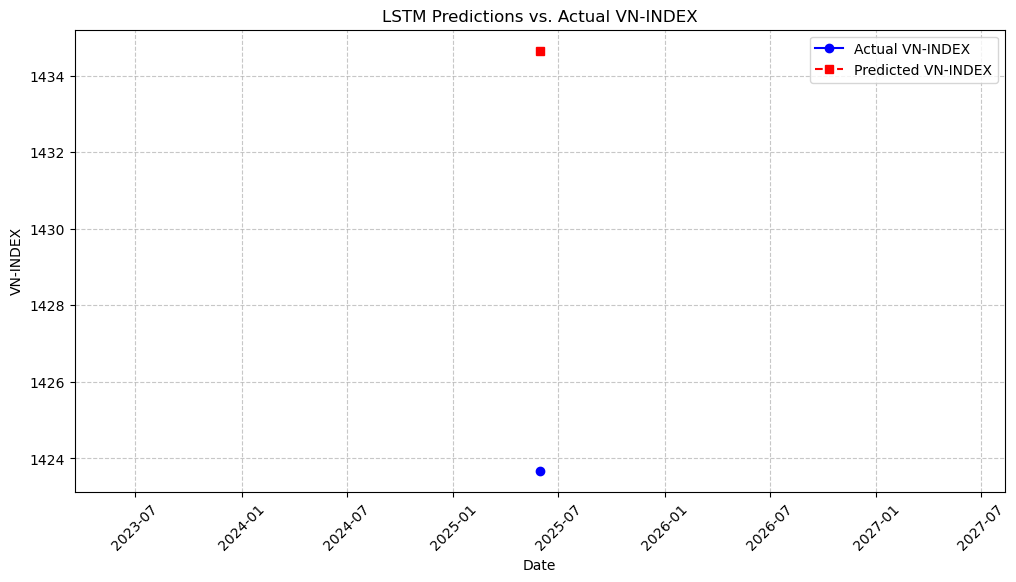

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-30      1423.679999         1434.652876


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5681    1432.01068
dtype: float64
Hello
5681    8.618513
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5681    1406.388378
dtype: float64
[DatetimeIndex(['2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-05-29 00:00:00
(5677, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.0916 - Val Loss: 0.0003
Test Loss: 0.0009
5681    1422.443034
dtype: float64
Date
2025-05-29    1431.569999
dtype: float64
(1,)
1 1 1
RMSE: 9.1270, MAE: 9.1270, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


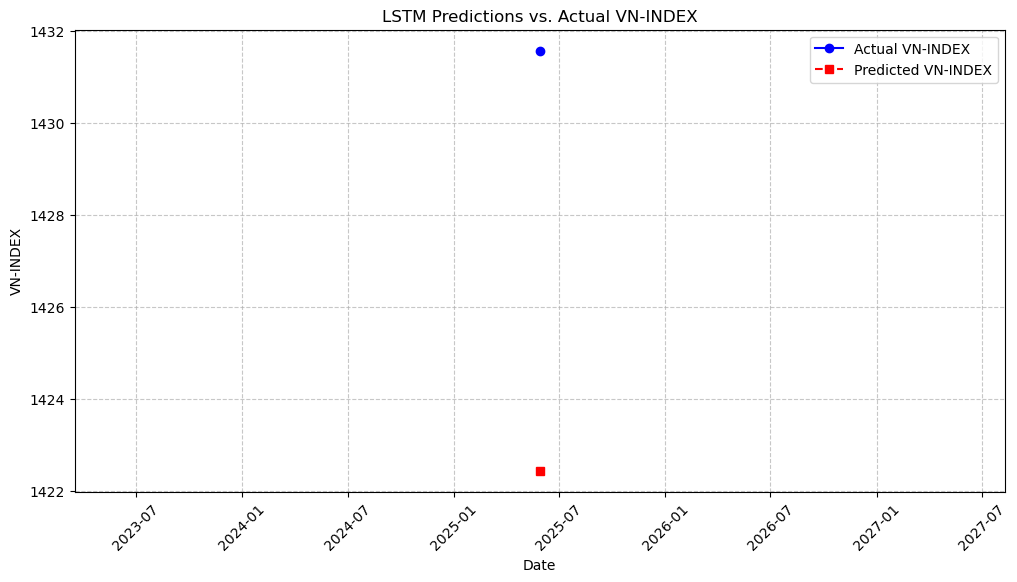

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-29      1431.569999         1422.443034


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5684    1424.507742
5685    1425.875941
dtype: float64
Hello
5684    29.266284
5685    22.283392
dtype: float64
5684    1408.289952
5685    1408.923810
dtype: float64
[DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02', '2025-06-03'], dtype='datetime64[ns]', name='Date', freq=No

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.5827 - Val Loss: 0.0012
Test Loss: 0.0000
5684    1430.307348
5685    1424.588516
dtype: float64
Date
2025-06-03    1437.870000
2025-06-04    1435.279999
dtype: float64
(2,)
2 2 2
RMSE: 9.2602, MAE: 9.1271, R²: -50.1326, Directional Accuracy: 1.0000


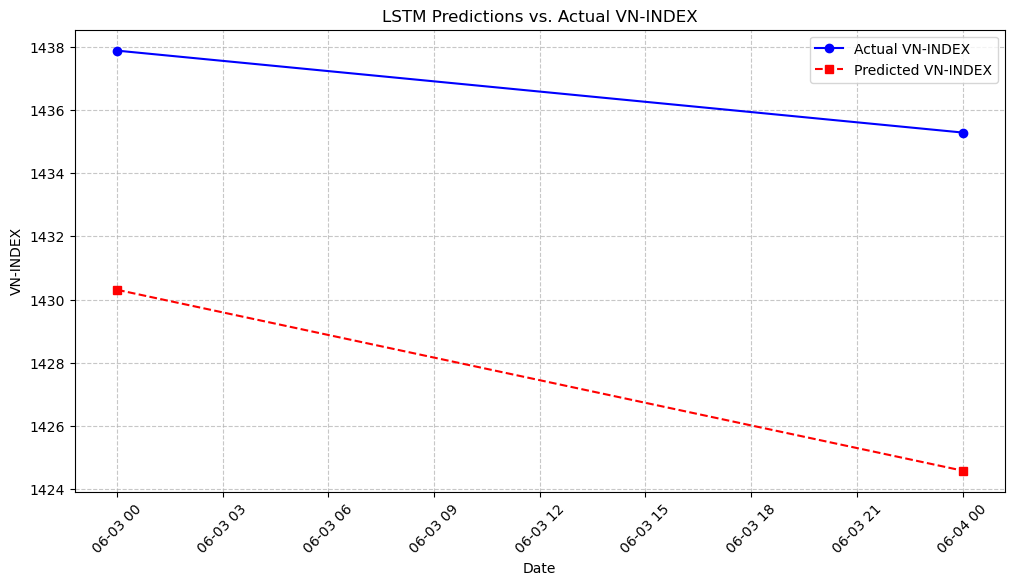

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-03      1437.870000         1430.307348
1 2025-06-04      1435.279999         1424.588516


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5682    1432.54047
5683    1435.57215
dtype: float64
Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5682    24.551189
5683    27.911957
dtype: float64
5682    1407.022219
5683    1407.656043
dtype: float64
[DatetimeIndex(['2025-05-19', '2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20', '2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datet

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.5942 - Val Loss: 0.0035
Test Loss: 0.1046
5682    1434.125221
5683    1438.194378
dtype: float64
Date
2025-05-30    1423.679999
2025-06-02    1423.040000
dtype: float64
(2,)
2 2 2
RMSE: 13.0146, MAE: 12.7998, R²: -1653.0940, Directional Accuracy: 0.0000


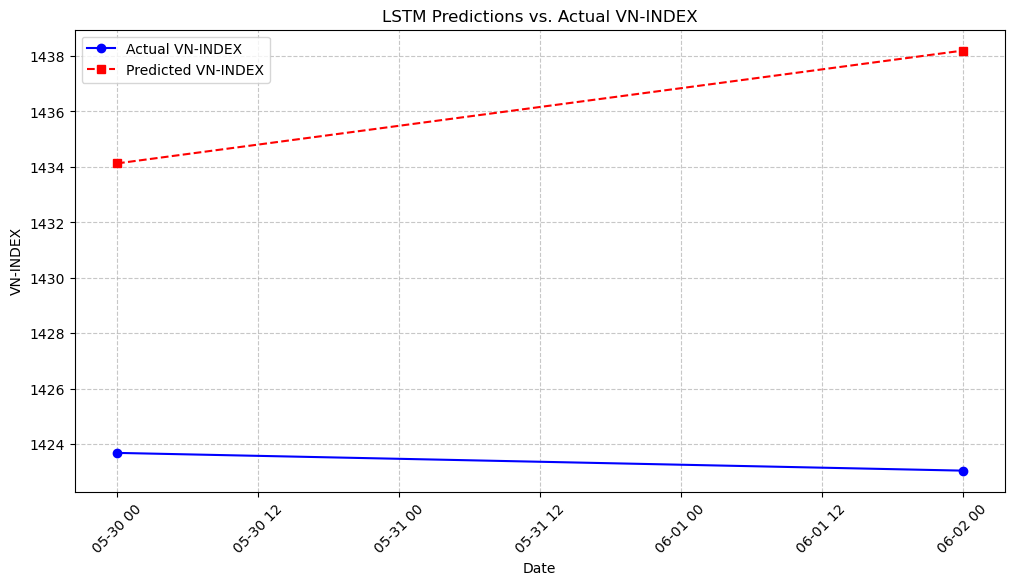

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-30      1423.679999         1434.125221
1 2025-06-02      1423.040000         1438.194378


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5680    1434.295511
5681    1436.085286
dtype: float64
Hello
5680    3.200840
5681   -2.459238
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5680    1405.754554
5681    1406.388343
dtype: float64
[DatetimeIndex(['2025-05-15', '2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-16', '2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19', '2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20', '2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-05-29 00:

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.5941 - Val Loss: 0.0003
Test Loss: 0.0012
5680    1419.517796
5681    1414.055320
dtype: float64
Date
2025-05-28    1432.190001
2025-05-29    1431.570001
dtype: float64
(2,)
2 2 2
RMSE: 15.2864, MAE: 15.0934, R²: -2430.5761, Directional Accuracy: 1.0000


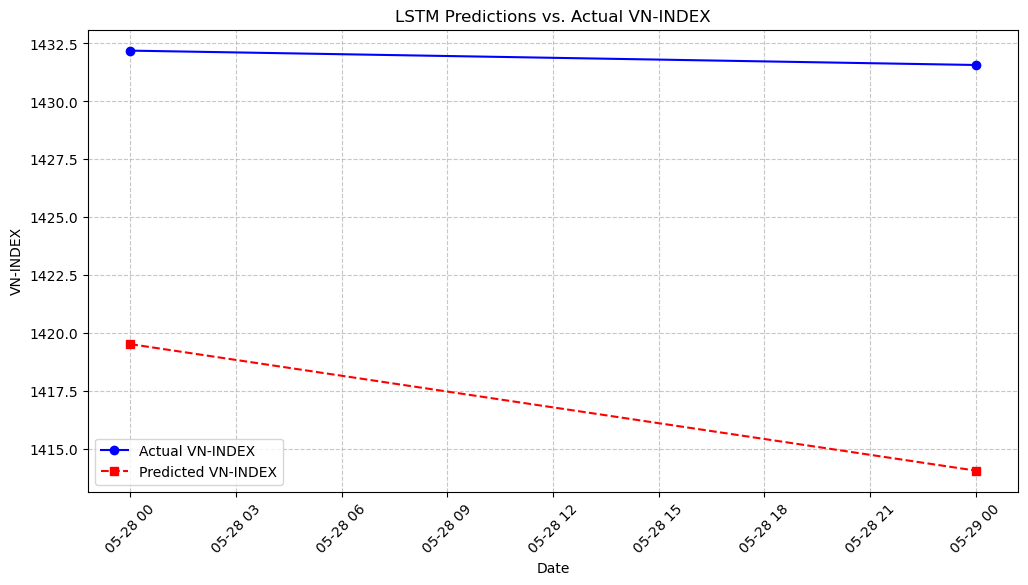

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-28      1432.190001         1419.517796
1 2025-05-29      1431.570001         1414.055320


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5678    1410.827699
5679    1409.758574
dtype: float64
Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5678   -0.557968
5679   -6.032532
dtype: float64
5678    1404.486959
5679    1405.120712
dtype: float64
[DatetimeIndex(['2025-05-13', '2025-05-14'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-14', '2025-05-15'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-15', '2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-16', '2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19', '2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20', '2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetim

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.6022 - Val Loss: 0.1026
Test Loss: 0.0002
5678    1411.500711
5679    1406.112035
dtype: float64
Date
2025-05-26    1423.850000
2025-05-27    1427.449999
dtype: float64
(2,)
2 2 2
RMSE: 17.4329, MAE: 16.8436, R²: -92.7984, Directional Accuracy: 0.0000


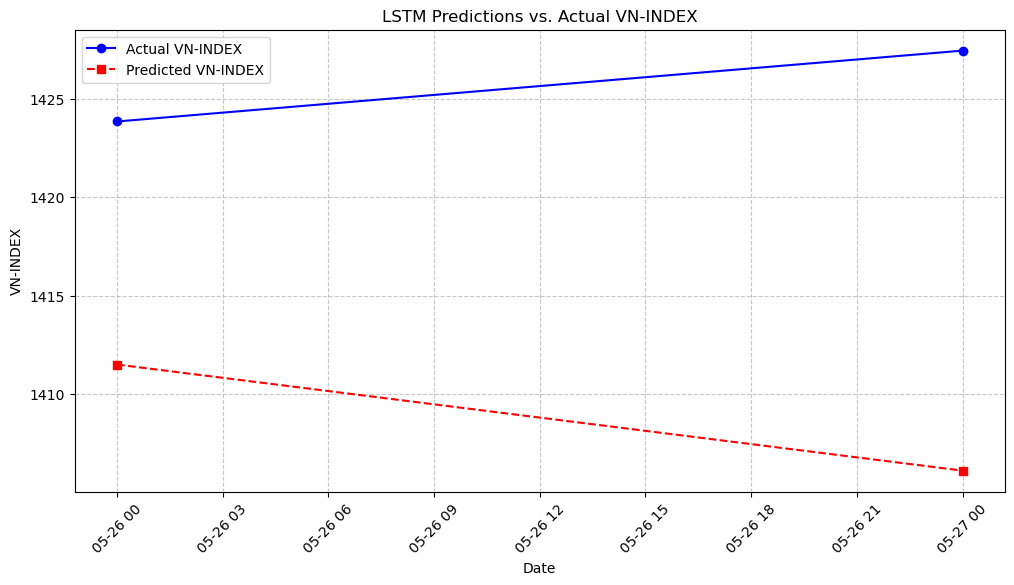

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-26      1423.850000         1411.500711
1 2025-05-27      1427.449999         1406.112035


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5676    1421.459650
5677    1427.164335
dtype: float64
Hello
5676   -9.934088
5677    3.408404
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


5676    1403.219435
5677    1403.853152
dtype: float64
[DatetimeIndex(['2025-05-09', '2025-05-12'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-12', '2025-05-13'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-13', '2025-05-14'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-14', '2025-05-15'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-15', '2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-16', '2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19', '2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20', '2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-05-23 00:

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.5821 - Val Loss: 0.0004
Test Loss: 0.0029
5676    1412.237225
5677    1425.482505
dtype: float64
Date
2025-05-22    1409.559999
2025-05-23    1409.399998
dtype: float64
(2,)
2 2 2
RMSE: 11.5285, MAE: 9.3799, R²: -20765.6741, Directional Accuracy: 0.0000


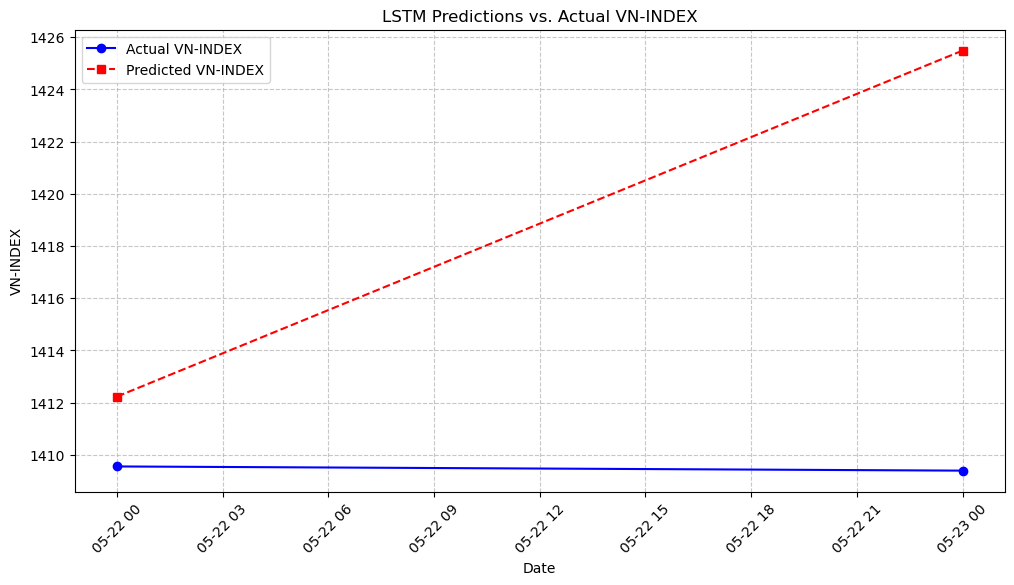

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-22      1409.559999         1412.237225
1 2025-05-23      1409.399998         1425.482505


In [6]:
for n_forecast in range(1, 3):
    # Testing
    for i in range(5):
        baseline = ExponentialSmoothing(
        df_1['VN_30_Close'].iloc[:-n_forecast*(i+1)],
        trend='add',            # additive trend
        seasonal='add',         # additive seasonality
        seasonal_periods=seasonal_periods    # one business‐year ≈ 261 days
        ).fit()

        # 2) Forecast the next day (one‐step ahead):
        price_forecast = baseline.forecast(n_forecast)

        # 3) If you want to extract the trend/seasonal forecasts separately:
        fitted_components = baseline.fittedvalues  # this is price = level+trend+seasonal
        level = baseline.level                     # the “smoothed level” ≈ trend
        seasonal = baseline.season                 # the seasonal factors

        print(price_forecast)

        data = df_1[['residual', 'trend', 'seasonal', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos']]

        if i:
            data = data.iloc[:-n_forecast*i]
        # 🚀 Train the model and get the test set
        model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion, tuning=False, train_seq_len=n_lags, test_seq_len=n_forecast, seasonal_periods=seasonal_periods, epochs=50)

Hello
5684    29.266284
5685    22.283392
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5684    1408.289952
5685    1408.923810
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02', '2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03', '2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-04 00:00:00
(5680, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.5827 - Val Loss: 0.0012
Test Loss: 0.0000
5684    1430.307348
5685    1424.588516
dtype: float64
Date
2025-06-03    1437.870000
2025-06-04    1435.279999
dtype: float64
(2,)
2 2 2
RMSE: 9.2602, MAE: 9.1271, R²: -50.1326, Directional Accuracy: 1.0000


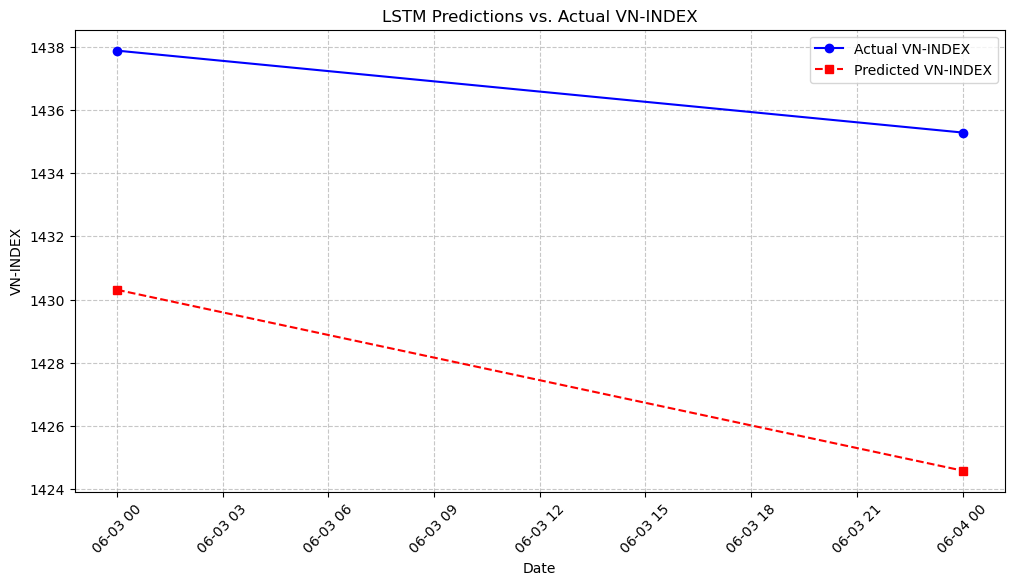

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-03      1437.870000         1430.307348
1 2025-06-04      1435.279999         1424.588516
torch.Size([1, 2, 1])


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5686    1409.557753
5687    1410.191644
dtype: float64
5686    1438.721776
5687    1442.002044
dtype: float64


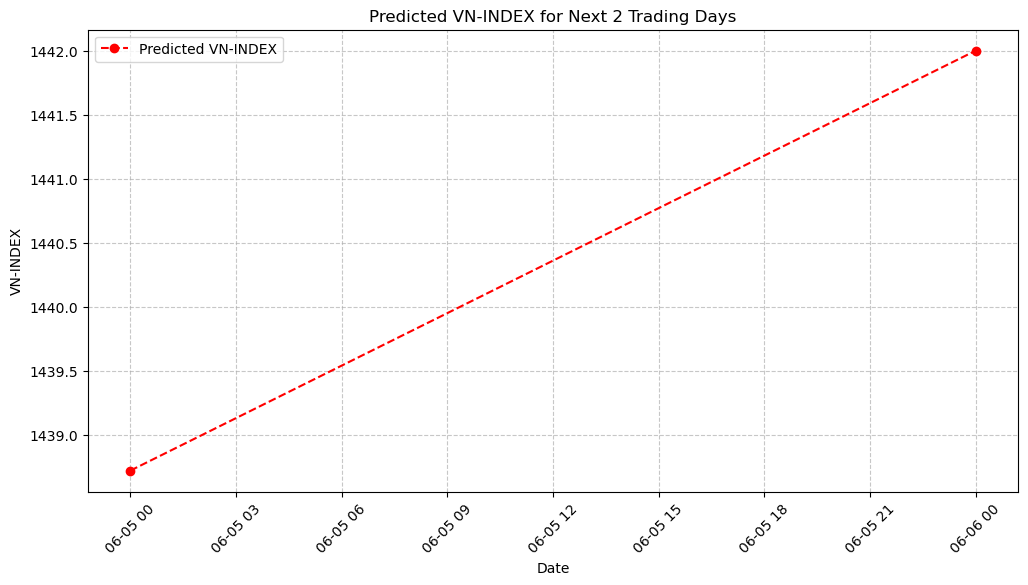

Date
2025-06-03    1437.87
2025-06-04    1435.28
dtype: float64


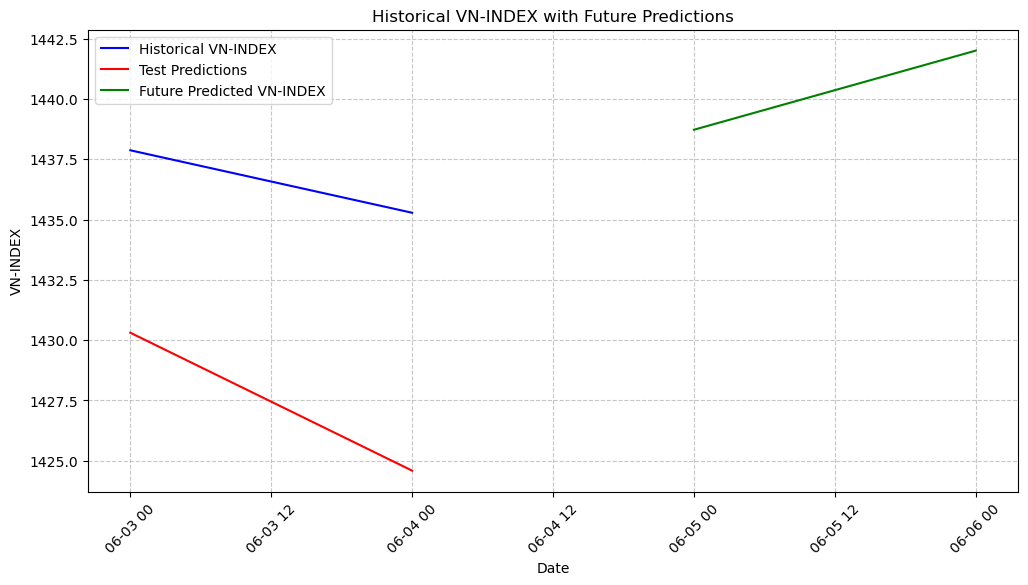

           Date  Predicted VN-INDEX
5686 2025-06-05         1438.721776
5687 2025-06-06         1442.002044


In [7]:
data = df_1[['residual', 'trend', 'seasonal', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos']]
# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion, tuning=False, train_seq_len=n_lags, test_seq_len=n_forecast, seasonal_periods=seasonal_periods, epochs=50)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast)